In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [2]:
df = pd.read_csv('/content/data_limpia-1.csv', sep = ",", encoding='utf-8',nrows=50000)

In [3]:
df.shape

(50000, 18)

In [4]:
df.describe()

,Unnamed: 0,AÑO,CBML,MES,NUMCOMUNA,X,Y,NUMBARRIO,LONGITUD,LATITUD
count,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,27087.246960,2017.35658,1.749918e+07,7.056380,11.574600,834010.233565,1.183115e+06,9.858980,-75.577307,6.249943
std,15637.061919,1.47366,6.917397e+08,3.118114,11.701284,2123.353407,3.159380e+03,9.399486,0.019160,0.028574
min,0.000000,2014.00000,1.010000e+02,1.000000,1.000000,820000.000000,1.174001e+06,0.000000,-75.703776,6.167365
25%,13552.750000,2016.00000,7.030000e+02,5.000000,7.000000,832938.450000,1.181115e+06,4.000000,-75.586979,6.231869
50%,27080.000000,2018.00000,1.013000e+03,7.000000,10.000000,834260.780000,1.183117e+06,8.000000,-75.575059,6.249966
75%,40634.250000,2019.00000,1.403000e+03,10.000000,14.000000,835337.367500,1.185409e+06,14.000000,-75.565278,6.270745
max,54170.000000,2019.00000,9.004000e+10,12.000000,90.000000,841724.400000,1.196215e+06,98.000000,-75.507491,6.367985


In [5]:
# Vista de los datos no numéricos

df.describe(include = 'object')

,CLASE_ACCIDENTE,DIRECCION,DISEÑO,FECHA_ACCIDENTE,FECHA_ACCIDENTES,GRAVEDAD_ACCIDENTE,BARRIO,COMUNA
count,50000,50000,50000,50000,50000,50000,50000,50000
unique,6,14302,12,43659,43659,3,301,21
top,Choque,CR 64 C CL 78,Tramo de via,10/03/2015 05:00:00,2015-03-10T10:00:00.000Z,Con heridos,La Candelaria,La Candelaria
freq,34254,218,33202,6,6,26826,1205,10676


In [6]:
# Selección de características de los accidentes

datos_accidentes= df[['GRAVEDAD_ACCIDENTE','DISEÑO','CLASE_ACCIDENTE']]

In [7]:
pd.crosstab(datos_accidentes['GRAVEDAD_ACCIDENTE'], 'Conteo')

col_0,Conteo
GRAVEDAD_ACCIDENTE,
Con heridos,26826
Con muertos,215
Solo daños,22959


In [8]:
# Conversión de las variables de tipo 'GRAVEDAD_ACCIDENTE','DISEÑO','CLASE_ACCIDENTE' a variables categórica
gravedad_accidente_dummies = pd.get_dummies(datos_accidentes, columns=['GRAVEDAD_ACCIDENTE','DISEÑO','CLASE_ACCIDENTE'], prefix = ['gra_','di_','cla_'])
datos_accidentes = datos_accidentes.join(gravedad_accidente_dummies)
datos_accidentes = datos_accidentes.drop(columns=['GRAVEDAD_ACCIDENTE','DISEÑO','CLASE_ACCIDENTE'], axis = 1)
datos_accidentes.describe()

,gra__Con heridos,gra__Con muertos,gra__Solo daños,di__Ciclo Ruta,di__Glorieta,di__Interseccion,di__Lote o Predio,di__Paso Elevado,di__Paso Inferior,di__Paso a Nivel,...,di__Puente,di__Tramo de via,di__Tunel,di__Via peatonal,cla__Atropello,cla__Caida Ocupante,cla__Choque,cla__Incendio,cla__Otro,cla__Volcamiento
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.0000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.536520,0.004300,0.459180,0.003160,0.028700,0.177160,0.11244,0.006160,0.002740,0.000680,...,0.0041,0.66404,0.00036,0.000300,0.093660,0.085920,0.685080,0.000120,0.102100,0.033120
std,0.498669,0.065434,0.498336,0.056126,0.166964,0.381808,0.31591,0.078244,0.052274,0.026068,...,0.0639,0.47233,0.01897,0.017318,0.291358,0.280249,0.464489,0.010954,0.302783,0.178952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,1.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,1.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.0000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
datos_accidentes

,gra__Con heridos,gra__Con muertos,gra__Solo daños,di__Ciclo Ruta,di__Glorieta,di__Interseccion,di__Lote o Predio,di__Paso Elevado,di__Paso Inferior,di__Paso a Nivel,...,di__Puente,di__Tramo de via,di__Tunel,di__Via peatonal,cla__Atropello,cla__Caida Ocupante,cla__Choque,cla__Incendio,cla__Otro,cla__Volcamiento
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
49996,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49997,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
49998,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [10]:
# Separación de datos en entrenamiento y validación

N = datos_accidentes.shape[0]
train_frac = 0.90
N_train = np.round(N*train_frac).astype('int')
rng = np.random.default_rng(seed = 1983)
indices = rng.integers(N, size = (N_train))

X_train = datos_accidentes.iloc[indices]
X_test = datos_accidentes.drop(index = indices)

In [11]:
# Escalamiento de los datos:

factor_centrado = X_train.min()
factor_escalado = X_train.max() - X_train.min()

X_train_escalado = (X_train - factor_centrado)/factor_escalado

X_train_escalado.describe()

,gra__Con heridos,gra__Con muertos,gra__Solo daños,di__Ciclo Ruta,di__Glorieta,di__Interseccion,di__Lote o Predio,di__Paso Elevado,di__Paso Inferior,di__Paso a Nivel,...,di__Puente,di__Tramo de via,di__Tunel,di__Via peatonal,cla__Atropello,cla__Caida Ocupante,cla__Choque,cla__Incendio,cla__Otro,cla__Volcamiento
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.00000,45000.000000,45000.000000,45000.000000,45000.000000,...,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,0.536333,0.004400,0.459267,0.003533,0.029778,0.17760,0.113444,0.005778,0.002467,0.000778,...,0.004111,0.661756,0.000400,0.000222,0.093222,0.084489,0.685467,0.000089,0.104867,0.031867
std,0.498684,0.066187,0.498344,0.059337,0.169976,0.38218,0.317139,0.075793,0.049605,0.027878,...,0.063987,0.473117,0.019996,0.014906,0.290747,0.278123,0.464335,0.009428,0.306385,0.175647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


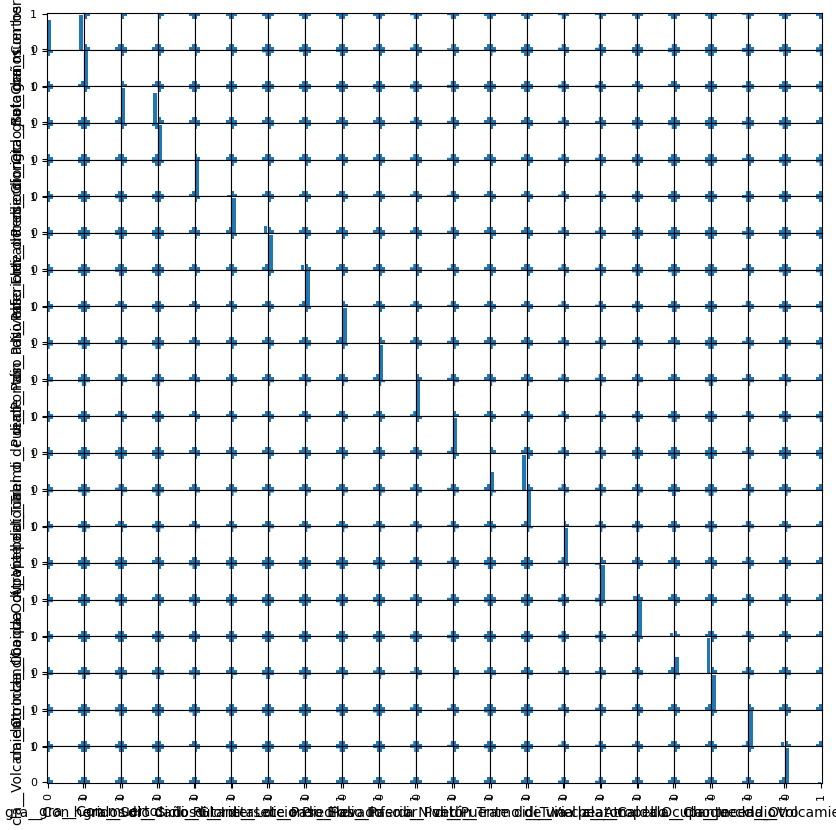

In [12]:
# Visualización de los datos

g = pd.plotting.scatter_matrix(X_train_escalado, figsize=(10,10), marker = '+', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

plt.show()

In [13]:
# Correlaciones
M_cor = X_train_escalado.corr().round(2)
M_cor

,gra__Con heridos,gra__Con muertos,gra__Solo daños,di__Ciclo Ruta,di__Glorieta,di__Interseccion,di__Lote o Predio,di__Paso Elevado,di__Paso Inferior,di__Paso a Nivel,...,di__Puente,di__Tramo de via,di__Tunel,di__Via peatonal,cla__Atropello,cla__Caida Ocupante,cla__Choque,cla__Incendio,cla__Otro,cla__Volcamiento
gra__Con heridos,1.00,-0.07,-0.99,-0.02,-0.09,-0.02,0.22,-0.01,0.00,-0.02,...,-0.01,-0.09,-0.01,-0.01,0.28,0.28,-0.61,-0.01,0.31,0.16
gra__Con muertos,-0.07,1.00,-0.06,-0.00,-0.01,-0.02,-0.02,0.00,-0.00,-0.00,...,-0.00,0.04,-0.00,-0.00,0.09,-0.01,-0.04,0.07,-0.02,-0.00
gra__Solo daños,-0.99,-0.06,1.00,0.02,0.09,0.02,-0.22,0.01,-0.00,0.02,...,0.01,0.09,0.01,0.01,-0.30,-0.28,0.61,-0.00,-0.31,-0.16
di__Ciclo Ruta,-0.02,-0.00,0.02,1.00,-0.01,-0.03,-0.02,-0.00,-0.00,-0.00,...,-0.00,-0.08,-0.00,-0.00,0.00,-0.01,0.01,0.04,-0.00,-0.01
di__Glorieta,-0.09,-0.01,0.09,-0.01,1.00,-0.08,-0.06,-0.01,-0.01,-0.00,...,-0.01,-0.25,-0.00,-0.00,-0.05,-0.04,0.09,-0.00,-0.04,-0.02
di__Interseccion,-0.02,-0.02,0.02,-0.03,-0.08,1.00,-0.17,-0.04,-0.02,-0.01,...,-0.03,-0.65,-0.01,-0.01,-0.05,-0.10,0.19,0.01,-0.12,-0.06
di__Lote o Predio,0.22,-0.02,-0.22,-0.02,-0.06,-0.17,1.00,-0.03,-0.02,-0.01,...,-0.02,-0.50,-0.01,-0.01,0.01,0.24,-0.35,0.00,0.25,0.08
di__Paso Elevado,-0.01,0.00,0.01,-0.00,-0.01,-0.04,-0.03,1.00,-0.00,-0.00,...,-0.00,-0.11,-0.00,-0.00,-0.01,-0.01,0.03,-0.00,-0.02,0.00
di__Paso Inferior,0.00,-0.00,-0.00,-0.00,-0.01,-0.02,-0.02,-0.00,1.00,-0.00,...,-0.00,-0.07,-0.00,-0.00,-0.01,-0.01,0.01,-0.00,0.00,-0.00
di__Paso a Nivel,-0.02,-0.00,0.02,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,1.00,...,-0.00,-0.04,-0.00,-0.00,-0.01,-0.01,0.02,-0.00,-0.01,-0.00


In [14]:
# Agrupamiento

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [15]:
# Mostrar con K=2 y luego con K=6
agrupador_kmeans = KMeans(n_clusters=6, n_init = 'auto', random_state=1984)
agrupador_kmeans.fit(X_train_escalado)

KMeans(n_clusters=6, n_init='auto', random_state=1984)

In [16]:
y_lab = agrupador_kmeans.fit_predict(X_train_escalado)
pd.crosstab(y_lab,'Conteo')

col_0,Conteo
row_0,
0,3802
1,14703
2,6049
3,3721
4,6940
5,9785


In [17]:
agrupador_kmeans.cluster_centers_

array([[ 9.98421883e-01,  1.57811678e-03,  1.34892097e-14,
         2.36717517e-03,  9.20568122e-03,  4.76065229e-02,
         3.67175171e-01,  2.36717517e-03,  7.89058390e-04,
         1.04083409e-17, -5.74627151e-18,  2.89321410e-03,
         5.66806944e-01,  5.26038927e-04,  2.63019463e-04,
         2.67841305e-15,  1.00000000e+00,  1.08801856e-14,
         5.01443505e-19, -4.66293670e-15,  7.28583860e-16],
       [-3.70814490e-14,  5.64510644e-03,  9.94354894e-01,
        -5.37764278e-17, -2.71657696e-15,  1.17683641e-14,
         4.20496971e-15, -1.89084859e-16, -1.49619900e-16,
         4.33680869e-19,  9.37834879e-18, -2.40259201e-16,
         1.00000000e+00,  3.52365706e-17,  3.16315984e-17,
        -4.20496971e-15, -8.46545056e-16,  9.94830987e-01,
        -1.66018458e-17,  3.06059988e-03,  2.10841325e-03],
       [ 3.05311332e-14,  3.30633163e-04,  9.99669367e-01,
         1.55397586e-02,  1.59695817e-01,  6.38452637e-01,
         1.31096049e-01,  2.33096380e-02,  7.60456274e

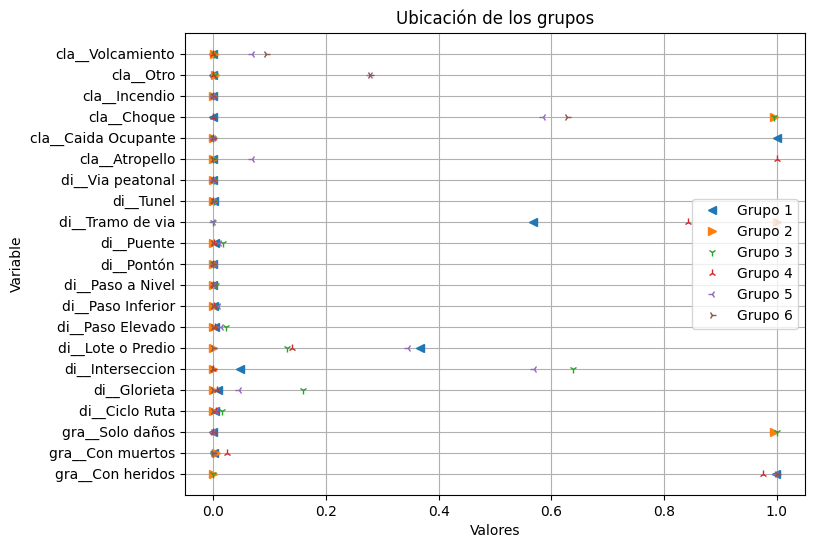

In [18]:
from matplotlib.lines import Line2D
#print(Line2D.markers)
mStyles = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11
]
plt.figure(figsize=(8,6))
for i in range(agrupador_kmeans.n_clusters):
  plt.plot(agrupador_kmeans.cluster_centers_[i,:], list(X_train_escalado), linestyle='None', marker=mStyles[i+5],label = ('Grupo ' + str(i+1)))
plt.title('Ubicación de los grupos')
plt.xlabel('Valores')
plt.ylabel('Variable')
plt.grid()
plt.legend()
plt.show()


In [19]:
datos_agrupados = X_train.groupby(y_lab)
datos_agrupados.median()

,gra__Con heridos,gra__Con muertos,gra__Solo daños,di__Ciclo Ruta,di__Glorieta,di__Interseccion,di__Lote o Predio,di__Paso Elevado,di__Paso Inferior,di__Paso a Nivel,...,di__Puente,di__Tramo de via,di__Tunel,di__Via peatonal,cla__Atropello,cla__Caida Ocupante,cla__Choque,cla__Incendio,cla__Otro,cla__Volcamiento
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


For n_clusters = 2 The average silhouette_score is : 0.45501690127626626
For n_clusters = 3 The average silhouette_score is : 0.4904458638968308
For n_clusters = 4 The average silhouette_score is : 0.5018424889590957
For n_clusters = 5 The average silhouette_score is : 0.5693398865185534
For n_clusters = 6 The average silhouette_score is : 0.6017363759011969


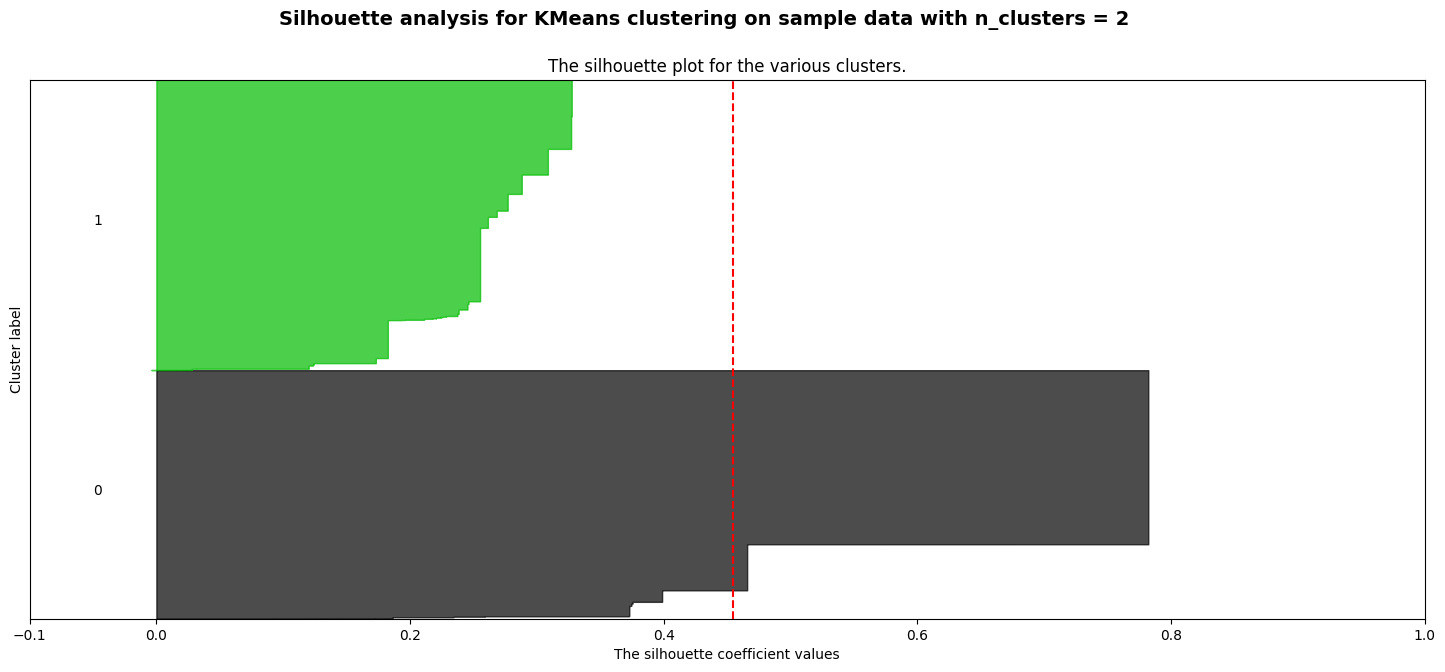

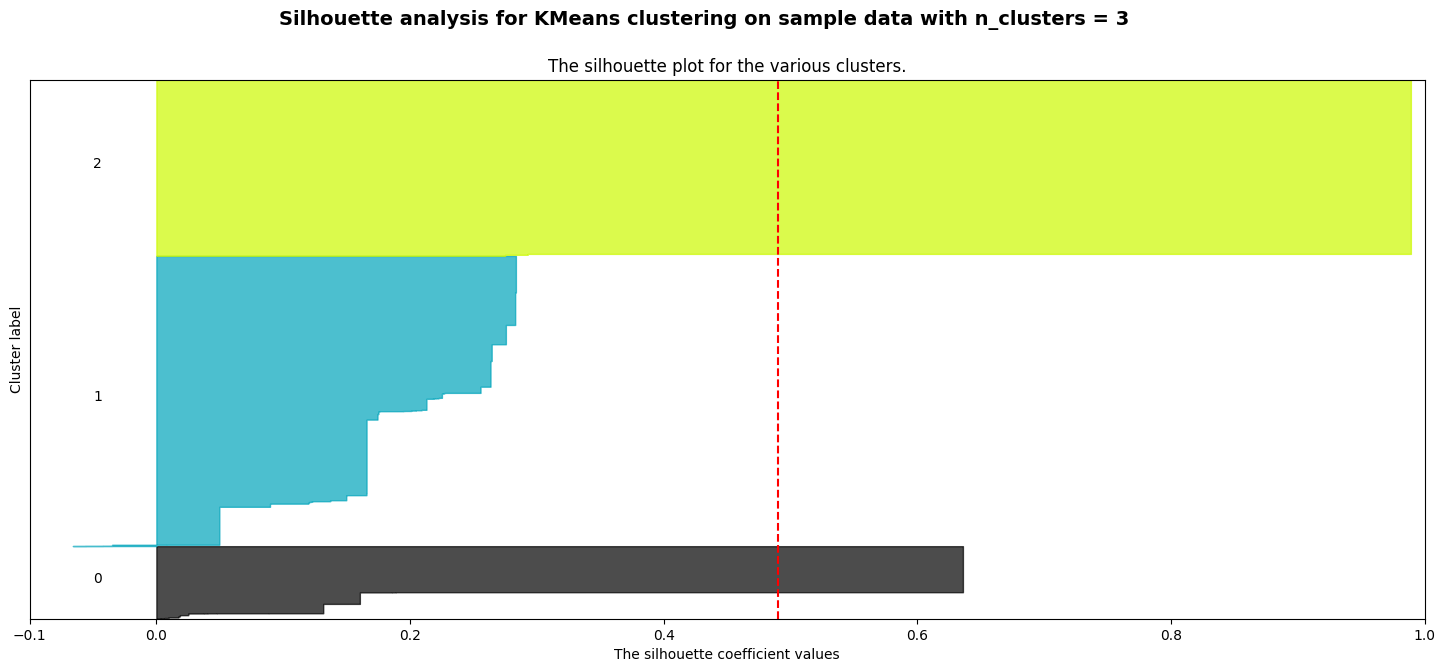

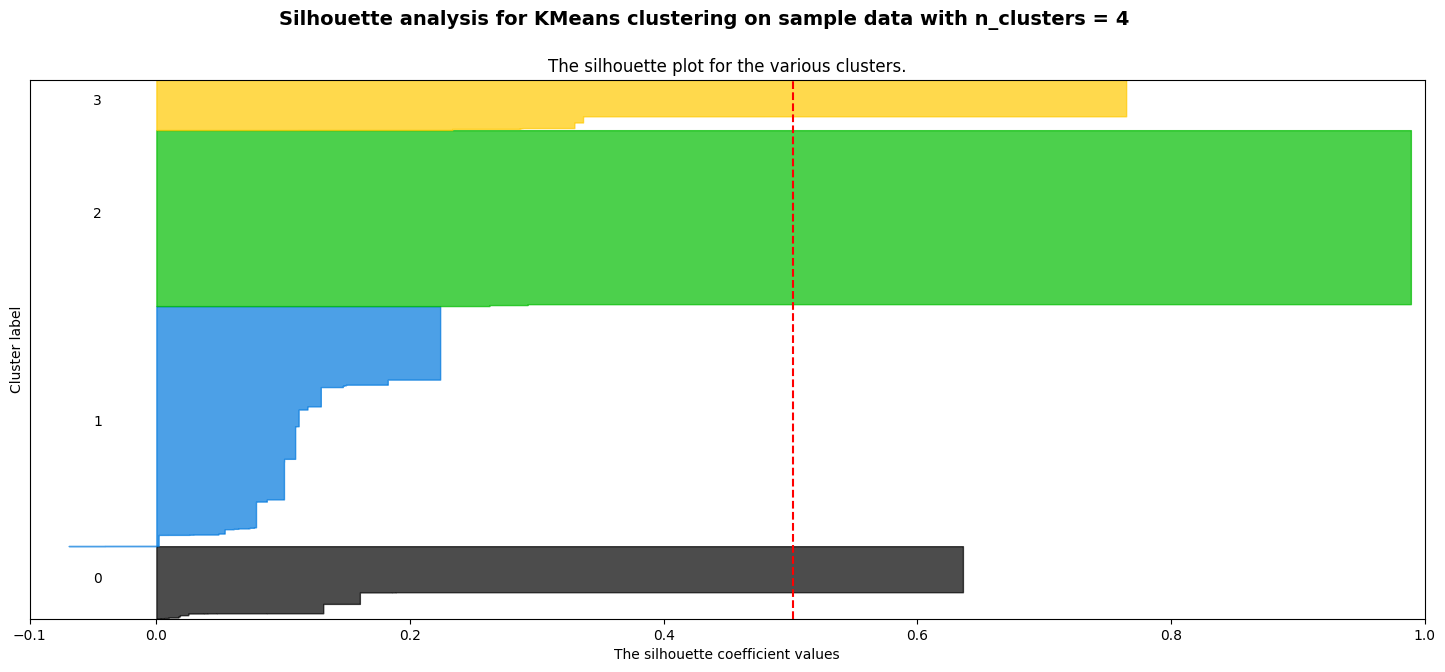

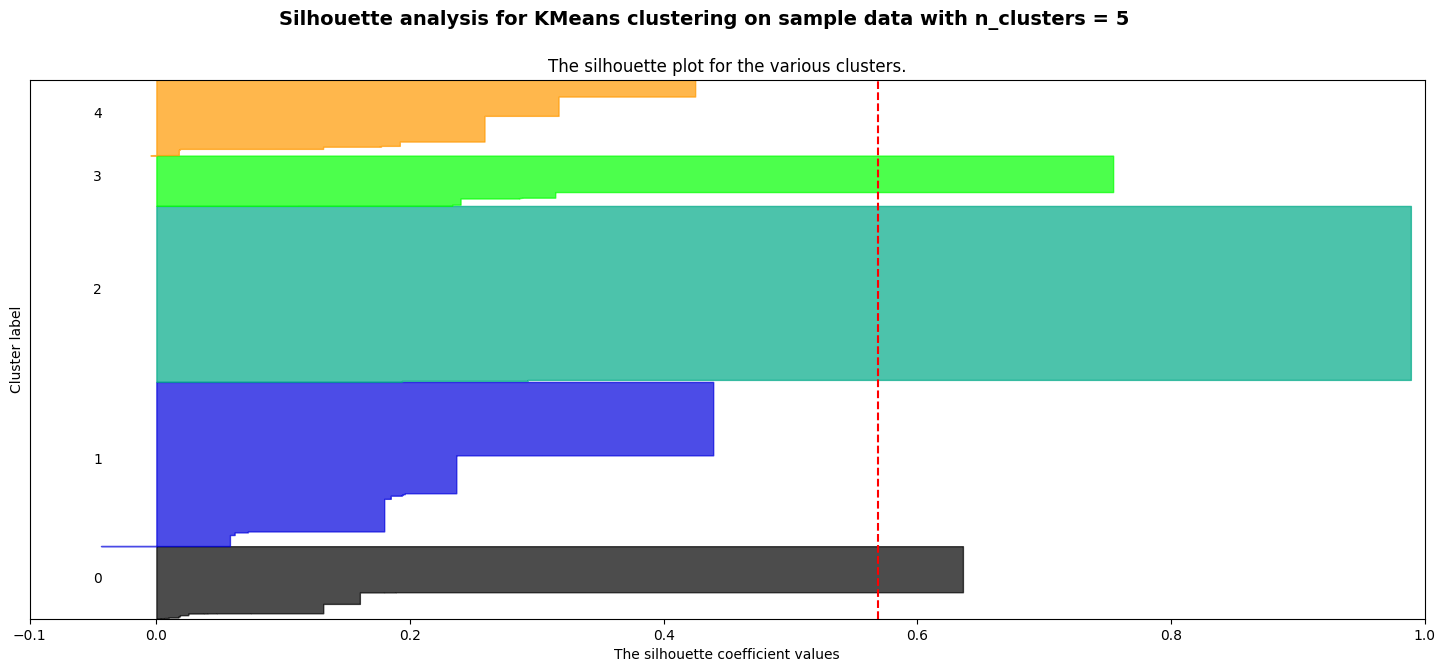

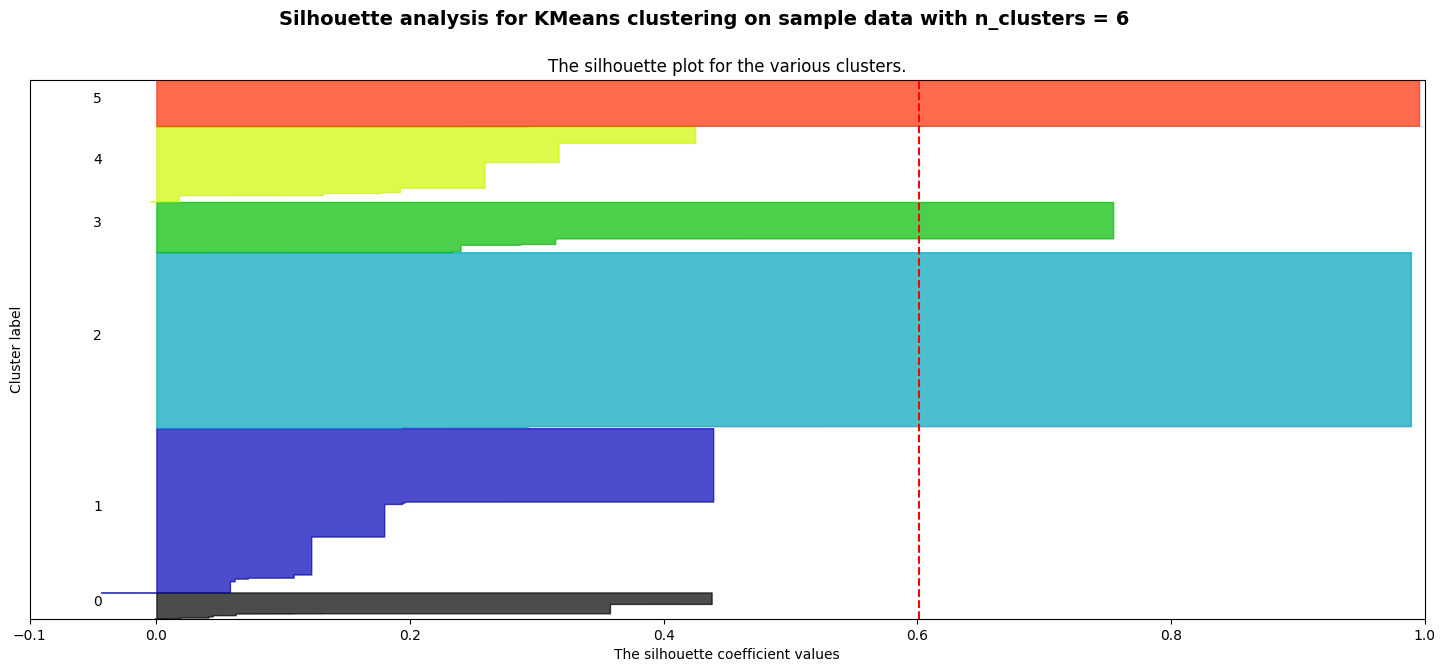

In [20]:
# Tomado de https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6]
X = X_train_escalado
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_escalado) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_escalado)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_escalado, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_escalado, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [21]:
# Ejemplo de análisis de variables de accidentes
# Se filtran las variables de accidentes
datos_accidentes = df[['CLASE_ACCIDENTE',
                       'DISEÑO',
                       'BARRIO']]

In [23]:
# Se agrupan los datos de accidentes con las etiquetas generadas por kmeans.
datos_accidentes_training = datos_accidentes.iloc[indices].groupby(y_lab)

In [25]:
# Se resumen las variables del dataframe agrupado por las etiquetas generadas por kmeans.
datos_accidentes_training.mean()

<ipython-input-25-79497c89932f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_accidentes_training.mean()


""
0
1
2
3
4
5


In [26]:
datos_accidentes_training[['CLASE_ACCIDENTE']].value_counts()

   CLASE_ACCIDENTE
0  Caida Ocupante      3802
1  Choque             14627
   Otro                  45
   Volcamiento           31
2  Choque              6022
   Otro                  21
   Volcamiento            5
   Incendio               1
3  Atropello           3721
4  Choque              4061
   Otro                1928
   Atropello            474
   Volcamiento          474
   Incendio               3
5  Choque              6136
   Otro                2725
   Volcamiento          924
dtype: int64

In [27]:
datos_accidentes_training[['BARRIO']].value_counts()

   BARRIO                       
0  Castilla                         81
   Campo Amor                       76
   La Candelaria                    68
   Caribe                           59
   Cabecera San Antonio de Prado    59
                                    ..
5  El Triunfo                        1
   El Picacho                        1
   Miravalle                         1
   Metropolitano                     1
   Llanaditas                        1
Length: 1588, dtype: int64

In [28]:
datos_accidentes_training[['DISEÑO']].value_counts()

   DISEÑO       
0  Tramo de via      2155
   Lote o Predio     1396
   Interseccion       181
   Glorieta            35
   Puente              11
   Ciclo Ruta           9
   Paso Elevado         9
   Paso Inferior        3
   Tunel                2
   Via peatonal         1
1  Tramo de via     14703
2  Interseccion      3862
   Glorieta           966
   Lote o Predio      793
   Paso Elevado       141
   Puente             101
   Ciclo Ruta          94
   Paso Inferior       46
   Paso a Nivel        27
   Tunel               11
   Via peatonal         7
   Pontón               1
3  Tramo de via      3136
   Lote o Predio      517
   Glorieta            24
   Ciclo Ruta          18
   Paso Elevado        14
   Paso Inferior        6
   Puente               5
   Via peatonal         1
4  Interseccion      3949
   Lote o Predio     2399
   Glorieta           315
   Paso Elevado        96
   Puente              68
   Paso Inferior       56
   Ciclo Ruta          38
   Paso a Nivel      

In [39]:
Closters=list(datos_accidentes_training)
Closters[0][1].describe()

,CLASE_ACCIDENTE,DISEÑO,BARRIO
count,3802,3802,3802
unique,1,10,262
top,Caida Ocupante,Tramo de via,Castilla
freq,3802,2155,81
